# Data Discretization

In [14]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer

In [15]:
# Load dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
# Impute missing values in age and fare using median
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())

<Axes: xlabel='age', ylabel='Count'>

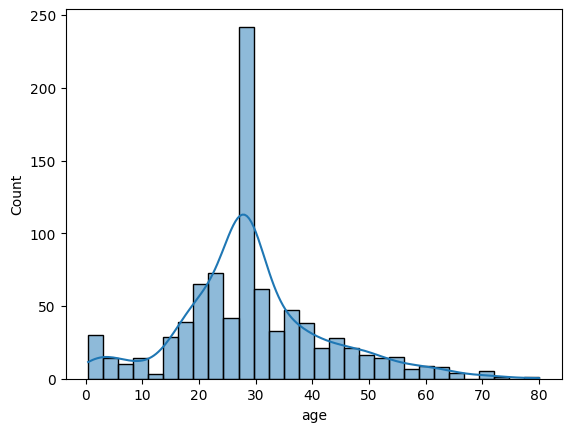

In [17]:
sns.histplot(df['age'], kde=True)

In [18]:
# Age discretization 
age_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df['age_bin'] = age_discretizer.fit_transform(df['age'].values.reshape(-1, 1)).astype(int)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bin
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2


<Axes: xlabel='age', ylabel='Count'>

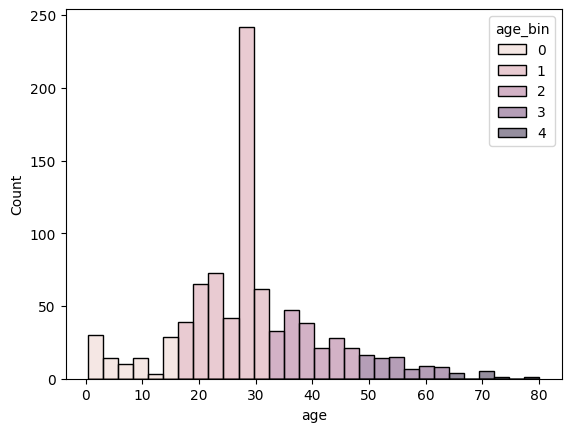

In [19]:
sns.histplot(df, x='age', hue='age_bin')

<Axes: xlabel='age', ylabel='Count'>

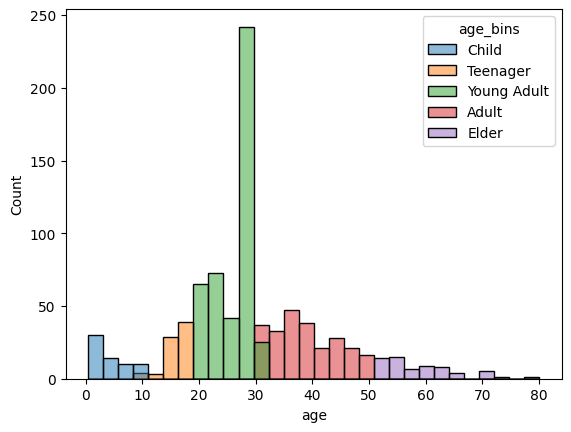

In [23]:
# Pandas method using manual binng
df['age_bins'] = pd.cut(df['age'], bins=[0, 10, 18, 30, 50, 80], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Elder'])
sns.histplot(df, x='age', hue='age_bins')